# Biểu đồ vùng, biểu đồ tần suất và biểu đồ hộp

Thời lượng ước tính: **30** phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

-   Tạo các lab bổ sung, cụ thể là biểu đồ vùng, biểu đồ tần suất và biểu đồ cột


## Mục lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Khám phá tập dữ liệu với *pandas*](#0)<br>
2.  [Download và chuẩn bị dữ liệu](#2)<br>
3.  [Trực quan hóa dữ liệu sử dụng Matplotlib](#4) <br>
4.  [Biểu đồ vùng](#6) <br>
5.  [Biểu đồ tần suất](#8) <br>
6.  [Biểu đồ cột](#10) <br>

</div>


# Khám phá tập dữ liệu với *pandas* và Matplotlib<a id="0"></a>

Bộ công cụ: Khóa học phần lớn dùng [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) và [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) cho việc dọn dẹp, phân tích và trực quan hóa dữ liệu. Thư viện vẽ biểu đồ chính mà chúng ta sẽ khám phá là [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Tập dữ liệu: Nhập cư tới Canada từ 1980 tới 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) từ trang web của Liên Hợp Quốc.

Tập dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế được ghi lại bởi các quốc gia điểm đến. Dữ liệu thể hiện cả dòng vào và dòng ra theo nơi sinh, quốc tịch hoặc nơi cư trú trước đây / tiếp theo của cả người nước ngoài và người mang quốc tịch. Trong bài học này, chúng ta sẽ tập trung vào dữ liệu Nhập cư Canada.

# Download và chuẩn bị dữ liệu <a id="2"></a>


Import mô-đun chính. Trước tiên chúng ta sẽ import 2 mô-đun phân tích dữ liệu chính: *pandas* và **Numpy**.


In [1]:
import numpy as np  # hữu ích với nhiều tính toán khoa học trong Python
import pandas as pd # thư viện cấu trúc dữ liệu chính

Hãy download và import tập dữ liệu Canadian Immigration chính của chúng tôi bằng phương thức _pandas_ `read_excel()`. Thông thường, chúng ta sẽ cần download một mô-đun _pandas_ yêu cầu đọc trong file excel trước khi có thể làm điều đó. Mô-đun này là **xlrd**. Để thuận tiện cho bạn, chúng tôi đã cài đặt sẵn mô-đun này, vì vậy bạn sẽ không phải lo lắng về điều đó. Nếu không, bạn sẽ cần chạy dòng code sau để cài đặt mô-đun **xlrd**:
```
!conda install -c anaconda xlrd --yes
```


Download tập dữ liệu và đọc nó thành dataframe *pandas*.


In [2]:

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy xem 5 hàng trên cùng của tập dữ liệu.


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Hãy xem có bao nhiêu mục nhập trong tập dữ liệu.

In [4]:
# in ra các kích thước của dataframe
print(df_can.shape)

(195, 43)


Dọn dẹp dữ liệu. Chúng ta sẽ thực hiện một số sửa đổi với tập dữ liệu gốc để giúp việc tạo hình ảnh trực quan dễ dàng hơn. Tham khảo lab `Introduction to Matplotlib and Line Plots` để biết thêm mô tả chi tiết và hợp lý về các thay đổi.

#### 1. Dọn dẹp tập dữ liệu để loại bỏ các cột không cung cấp thông tin cho trực quan hóa (ví dụ: Type, AREA, REG).


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Lưu ý cách các cột Type, Coverage, AREA, REG, và DEV đã bị xóa khỏi dataframe.

#### 2. Đổi tên một số cột sao cho phù hợp.

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Lưu ý rằng tên cột bây giờ có ý nghĩa hơn nhiều.

#### 3. Để thống nhất, hãy đảm bảo tất cả các nhãn cột đều thuộc kiểu string.


In [7]:
# hãy kiểm tra các kiểu của nhãn cột
all(isinstance(column, str) for column in df_can.columns)

False

Lưu ý cách dòng code trên trả về *False* khi chúng ta kiểm tra xem tất cả các nhãn cột có thuộc kiểu **string** hay không. Vì vậy, hãy thay đổi tất cả chúng thành kiểu **string**.

In [8]:
df_can.columns = list(map(str, df_can.columns))

# giờ hãy kiểm tra các kiểu của nhãn cột
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Đặt tên quốc gia làm chỉ mục - phương thức .loc hữu ích khi tra cứu nhanh các quốc gia.

In [9]:
df_can.set_index('Country', inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Chú ý rằng giờ tên quốc gia làm các chỉ mục.

#### 5. Thêm cột Total.


In [10]:
df_can['Total'] = df_can.sum(axis=1)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

<ipython-input-10-fd50315ff87a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Bây giờ dataframe có thêm một cột thể hiện tổng số người nhập cư từ mỗi quốc gia trong tập dữ liệu từ 1980 - 2013. Vì vậy, nếu chúng ta in kích thước của dữ liệu sẽ nhận được:

In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Vì vậy, bây giờ dataframe có 38 cột thay vì 37 cột như trước đây.

In [12]:
# cuối cùng, hãy tạo một list các năm từ 1980-2013
# điều này sẽ hữu ích khi chúng ta bắt đầu vẽ biểu đồ
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Trực quan hóa dữ liệu bằng Matplotlib<a id="4"></a>


Import `Matplotlib` và **Numpy**.


In [13]:
# sử dụng inline backend để tạo biểu đồ trong trình duyệt
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # tùy chọn: style ggplot

# kiểm tra phiên bản mới nhất của Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Biểu đồ vùng<a id="6"></a>


Trong phần trước, chúng ta đã tạo một biểu đồ đường hiển thị 5 quốc gia hàng đầu có nhiều người nhập cư đến Canada nhất từ năm 1980 đến năm 2013. Chỉ cần sửa đổi code một chút, chúng ta có thể hiển thị biểu đồ này như một biểu đồ tích lũy, còn được gọi là **Biểu đồ đường xếp** hoặc **Biểu đồ vùng**.


In [23]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# lấy mục nhập top 5
df_top5 = df_can.head(5)
# chuyển vị dataframe
df_top5 = df_top5[years].transpose()

df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Theo mặc định, biểu đồ vùng được xếp chồng lên nhau. Và để tạo ra một biểu đồ vùng xếp chồng, mỗi cột phải có tất cả các giá trị dương hoặc tất cả các giá trị âm (mọi giá trị NaN sẽ được đặt mặc định là 0). Để tạo ra một biểu đồ không xếp chồng, hãy nhập `stacked=False`.


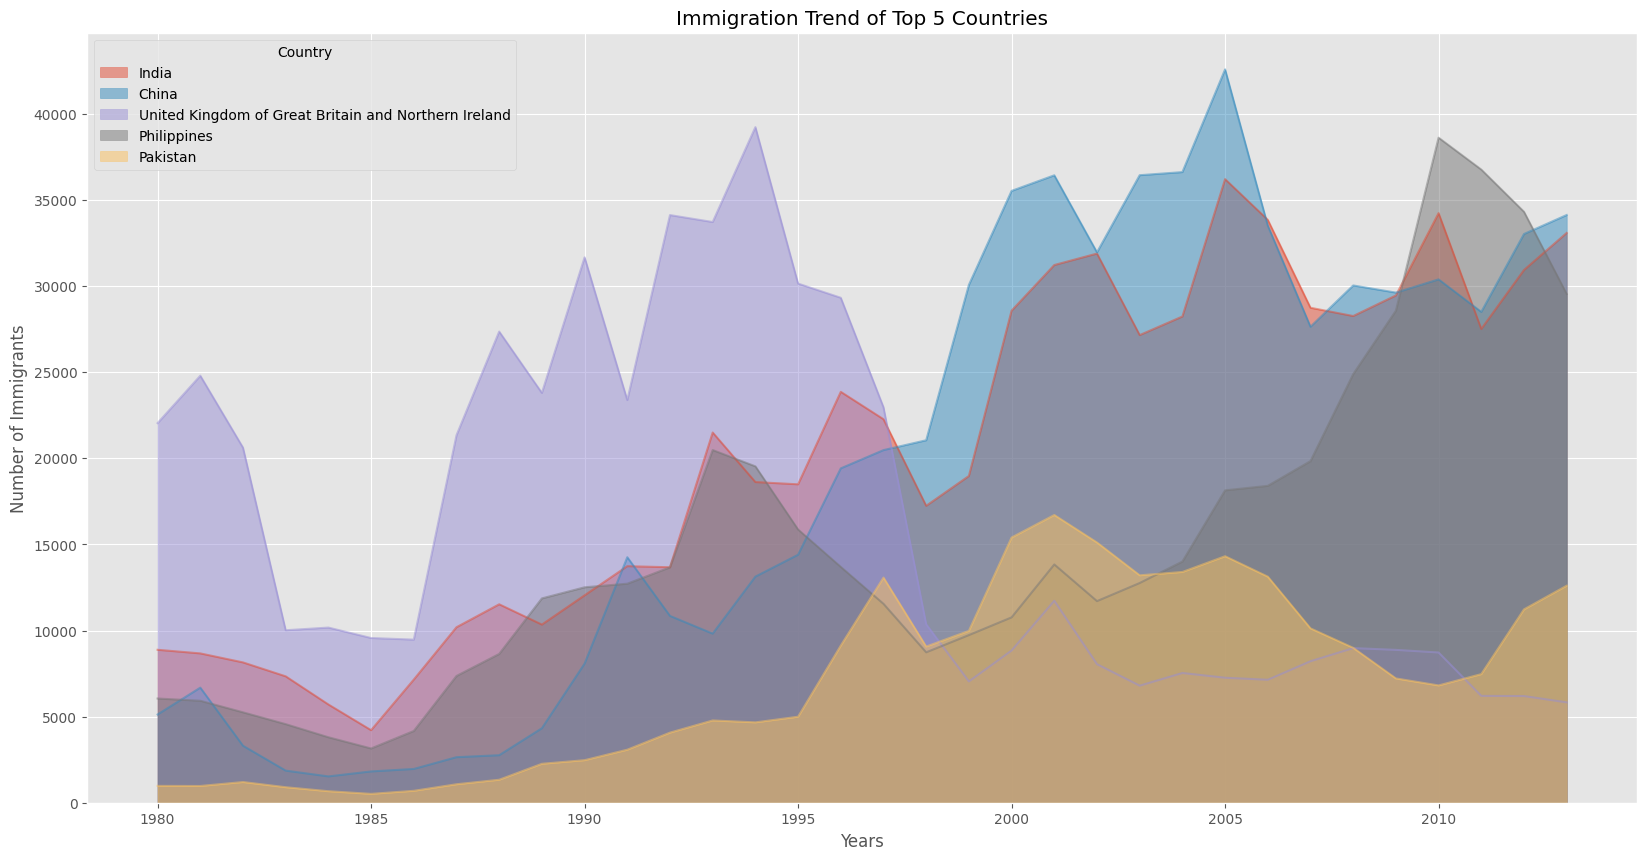

In [24]:
# df_top5.index = map(int, df_top5.index)
df_top5.index = df_top5.index.map(int) # hãy đổi giá trị chỉ mục của df_top5 thành kiểu integer để vẽ biểu đồ
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # nhập kích thước tuple (x, y)
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Biểu đồ không xếp chồng có transparency mặc định (chỉ số alpha) là 0,5. Chúng ta có thể sửa đổi giá trị này bằng cách chuyển vào tham số `alpha`.


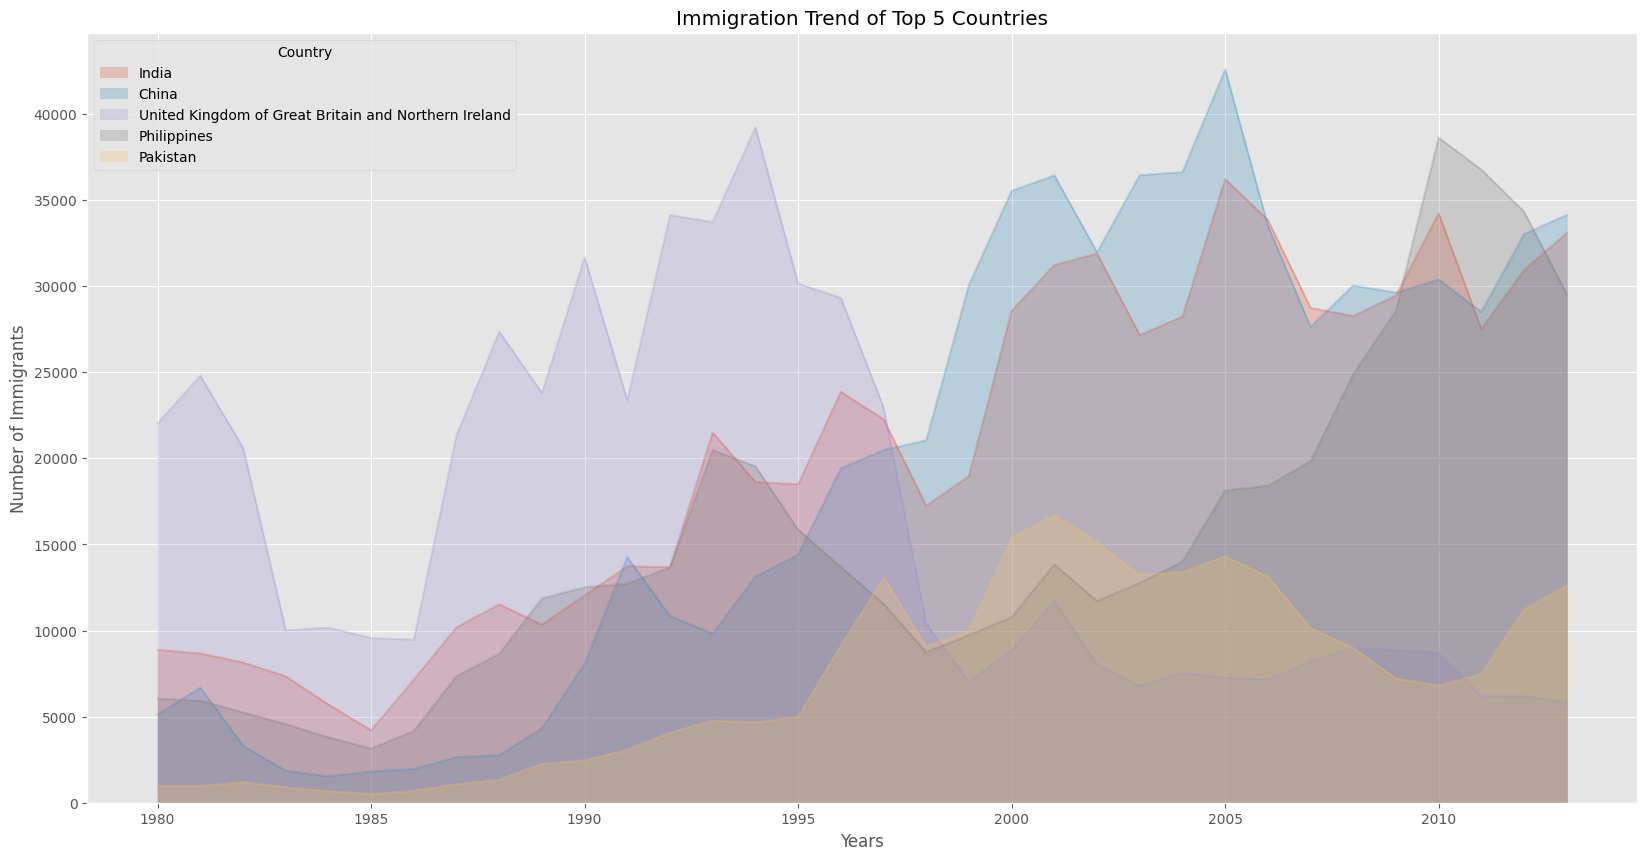

In [25]:
df_top5.plot(kind='area',
             alpha=0.25, # 0-1, giá trị mặc định a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Hai loại biểu đồ

Như chúng ta đã thảo luận trong các bài giảng video, có hai loại / lựa chọn vẽ biểu đồ với `matplotlib`. Vẽ biểu đồ bằng lớp Artist và lớp scripting.

**Lựa chọn 1: Lớp Scripting (Phương thức cấu trúc) - sử dụng matplotlib.pyplot as 'plt'**

Bạn có thể sử dụng `plt`, chẳng hạn: `matplotlib.pyplot` và thêm nhiều phần tử hơn bằng cách gọi các phương thức khác nhau theo cấu trúc, ví dụ, `plt.title(...)` để thêm tiêu đề hoặc `plt.xlabel(...)` để thêm nhãn vào trục x.

```python
    # Tùy chọn 1: Đây là thứ chúng ta vẫn đang sử dụng
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Lựa chọn 2: Lớp Artist (Phương thức hướng đối tượng) - Sử dụng một `Axes` từ Matplotlib (ưu tiên)**

Bạn có thể sử dụng `Axes` của biểu đồ hiện có và lưu nó trong một biến (ví dụ: `ax`). Bạn có thể thêm nhiều phần tử hơn bằng cách gọi các phương thức với một chút thay đổi về cú pháp (bằng cách thêm "_set_" vào các phương thức trước đó). Ví dụ: sử dụng `ax.set_title()` thay vì `plt.title()` để thêm tiêu đề hoặc `ax.set_xlabel()` thay vì `plt.xlabel()` để thêm nhãn vào trục x.

Tùy chọn này đôi khi minh bạch và linh hoạt hơn khi sử dụng cho các biểu đồ nâng cao (đặc biệt khi có nhiều biểu đồ, như bạn sẽ thấy ở phần sau).

Trong khóa học này, chúng ta sẽ chỉ sử dụng **lớp scripting**, ngoại trừ một số hình ảnh trực quan nâng cao cần sử dụng **lớp artist** khi xử lý các khía cạnh nâng cao của các biểu đồ.


In [ ]:
# Tùy chọn 2: tùy chọn ưu tiên có tính linh hoạt hơn
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Câu hỏi**: Sử dụng lớp scripting để tạo biểu đồ vùng xếp chồng của 5 quốc gia có ít người nhập cư vào Canada nhất **từ** 1980 đến 2013. Sử dụng giá trị transparency là 0,45.


Text(0, 0.5, 'Number of immigrants')

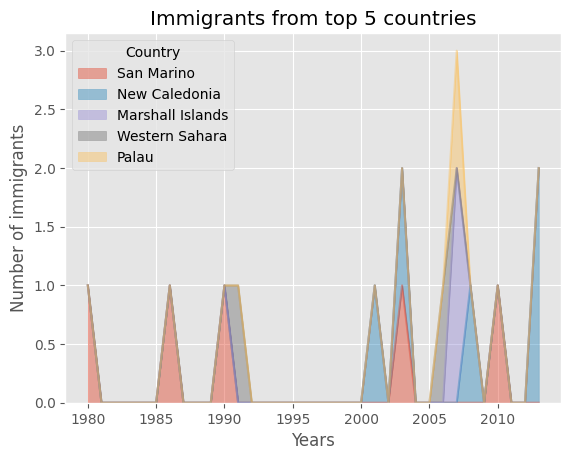

In [31]:
### nhập đáp án của bạn tạo đây
df_low5 = df_can.tail(5)
df_low5 = df_low5[years].transpose()
df_low5.index = map(int,df_low5.index)
df_low5.plot(kind = 'area',stacked = True, alpha = 0.45)
plt.title("Immigrants from top 5 countries")
plt.xlabel('Years')
plt.ylabel("Number of immigrants")

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    # lấy 5 quốc gia có số người nhập cư vào Canada ít nhất
    df_least5 = df_can.tail(5)
     
    # chuyển vị dataframe
    df_least5 = df_least5[years].transpose()
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # hãy thay đổi giá trị chỉ số của df_least5 thành kiểu integer để vẽ biểu đồ
    df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

    plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()
    
```

</details>


**Câu hỏi**: Sử dụng lớp artist để tạo biểu đồ vùng không xếp chồng của 5 quốc gia có số người nhập cư vào Canada ít nhất **từ** 1980 đến 2013. Sử dụng giá trị transparency là 0,55.


Text(0.5, 0, 'Years')

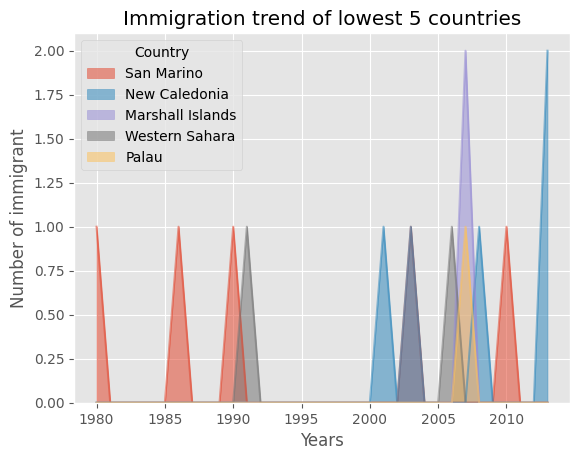

In [32]:
### nhập đáp án của bạn tạo đây
ax = df_low5.plot(kind='area', alpha = 0.55, stacked=False)
ax.set_title('Immigration trend of lowest 5 countries')
ax.set_ylabel('Number of immigrant')
ax.set_xlabel('Years')

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    
    # lấy 5 quốc gia có số người nhập cư vào Canada ít nhất
    df_least5 = df_can.tail(5)

    # chuyển vị dataframe
    df_least5 = df_least5[years].transpose()
    
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # hãy thay đổi giá trị chỉ số của df_least5 thành kiểu integer để vẽ biểu đồ
    
    ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
    ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')

    
```

</details>


# Biểu đồ tần suất<a id="8"></a>

Biểu đồ tần suất là một cách biểu diễn phân phối _tần suất_ của tập dữ liệu số. Nó hoạt động bằng cách phân vùng trục x thành _bin_, gán mỗi điểm dữ liệu trong tập dữ liệu vào một bin, sau đó đếm số điểm dữ liệu đã được gán cho mỗi bin. Vì vậy, trục y là tần số hoặc số điểm dữ liệu trong mỗi bin. Lưu ý rằng chúng ta có thể thay đổi kích thước bin và thường thì cần phải tinh chỉnh nó để phân phối được hiển thị đẹp mắt.

**Câu hỏi:** Phân bố tần suất số lượng (dân số) của những người nhập cư mới từ các quốc gia khác nhau đến Canada trong năm 2013 là bao nhiêu?


Trước khi tiến hành tạo biểu đồ biểu đồ, trước tiên chúng ta hãy kiểm tra dữ liệu được chia thành các khoảng thời gian. Chúng ta thực hiện điều này bằng phương thức `histogram` của **Numpy** để lấy các phạm vi bin và lượng tần suất như sau:


In [33]:
# hãy xem qua dữ liệu trong năm 2013
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [34]:
# np.histogram trả về 2 giá trị
count, bin_edges = np.histogram(df_can['2013'])

print(count) # lượng tần suất
print(bin_edges) # các khoảng bin, mặc định = 10 bin

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Theo mặc định, phương thức `histogram` chia nhỏ tập dữ liệu thành 10 bin. Hình dưới đây tóm tắt các phạm vi bin và phân bố tần suất nhập cư trong năm 2013. Chúng ta có thể thấy rằng trong năm 2013:

-   178 quốc gia có từ 0 đến 3412,9 người nhập cư
-   11 quốc gia có từ 3412,9 đến 6825,8 người nhập cư
-   1 quốc gia có từ 6285,8 đến 10238,7 người nhập cư,...

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>


Chúng ta có thể dễ dàng vẽ biểu đồ phân phối này bằng cách chuyển `kind=hist` thành `plot()`.


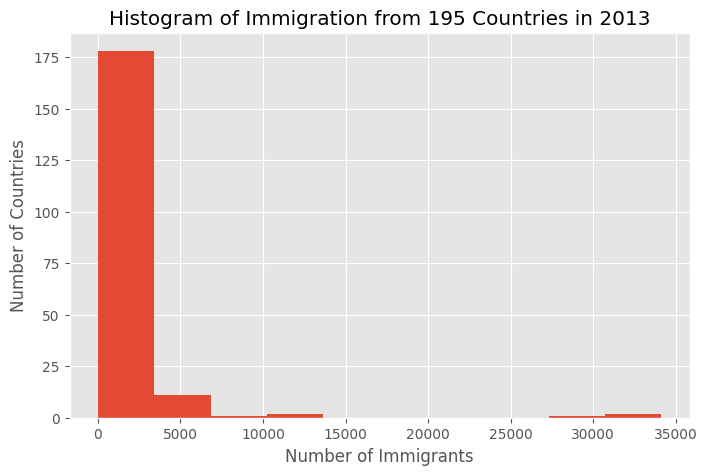

In [35]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # thêm tiêu đề vào biểu đồ
plt.ylabel('Number of Countries') # thêm nhãn y
plt.xlabel('Number of Immigrants') # thêm nhãn x

plt.show()

Trong biểu đồ trên, trục x thể hiện phạm vi dân số của những người nhập cư trong khoảng 3412,9. Trục y thể hiện số quốc gia đã đóng góp vào dân số nói trên.

Lưu ý rằng các nhãn trục x không khớp với kích thước bin. Có thể khắc phục điều này bằng cách truyền từ khóa `xticks` có chứa danh sách các kích thước bin, như sau:


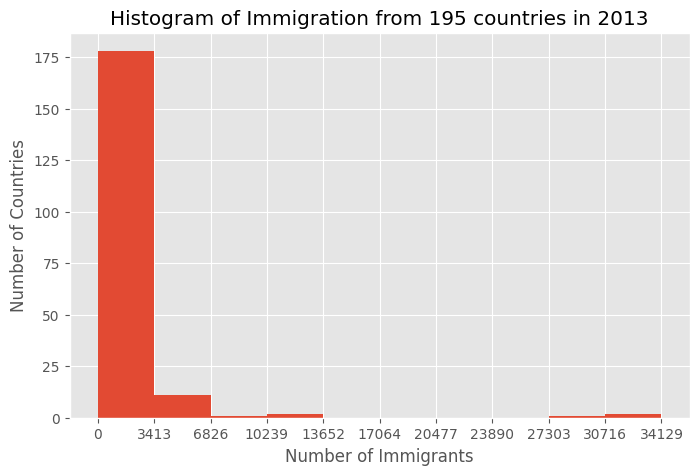

In [36]:
# 'bin_edges' là list các khoảng bin
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # thêm tiêu đề vào biểu đồ
plt.ylabel('Number of Countries') # thêm nhãn y
plt.xlabel('Number of Immigrants') # thêm nhãn x

plt.show()

*Lưu ý ngoài lề:* Thay vào đó, chúng ta có thể sử dụng `df_can ['2013']. plot.hist()`. Trên thực tế, trong suốt bài học này, việc sử dụng `some_data.plot(kind='type_plot',...)` tương đương với `some_data.plot.type_plot(...)`. Nghĩa là, việc truyền kiểu của biểu đồ làm đối số hoặc phương thức hoạt động giống nhau.

Để biết thêm thông tin, hãy xem tài liệu _pandas_ [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


Chúng ta cũng có thể vẽ nhiều biểu đồ tần suất trên cùng một biểu đồ. Ví dụ: hãy thử trả lời các câu hỏi sau bằng biểu đồ tần suất.

**Câu hỏi**: Sự phân bố nhập cư của Đan Mạch, Na Uy và Thụy Điển trong những năm 1980 - 2013 là bao nhiêu?


In [37]:
# hãy xem nhanh tập dữ liệu
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

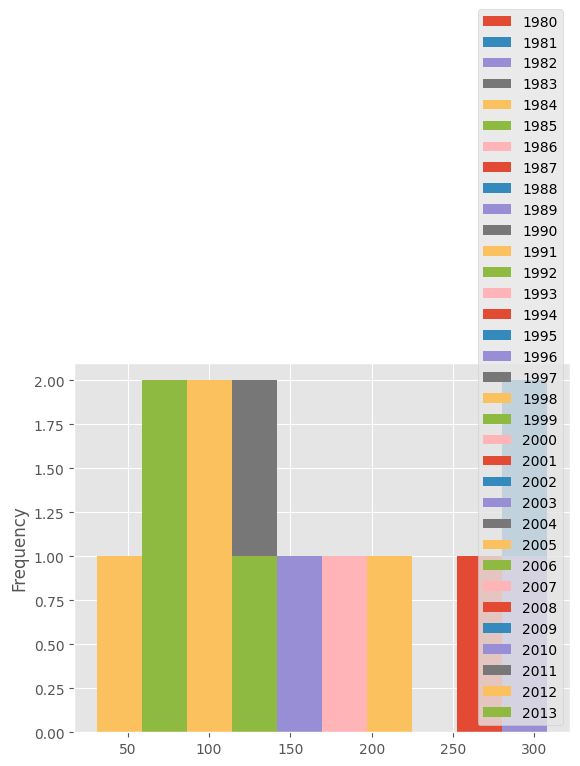

In [38]:
# tạo biểu đồ tần suất
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Điều đó có vẻ không đúng!

Đừng lo lắng, bạn sẽ thường xuyên gặp phải những tình huống như thế này khi tạo ra các biểu đồ. Giải pháp thường nằm ở cách cấu trúc tập dữ liệu cơ bản.

Thay vì vẽ biểu đồ phân bố tần suất dân số của dân số cho 3 quốc gia, _pandas_ sẽ vẽ biểu đồ phân bố tần suất dân số cho `years`.

Điều này có thể dễ dàng khắc phục bằng cách chuyển vị tập dữ liệu trước tiên, sau đó vẽ biểu đồ như hình dưới đây.


In [39]:
# chuyển vị dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


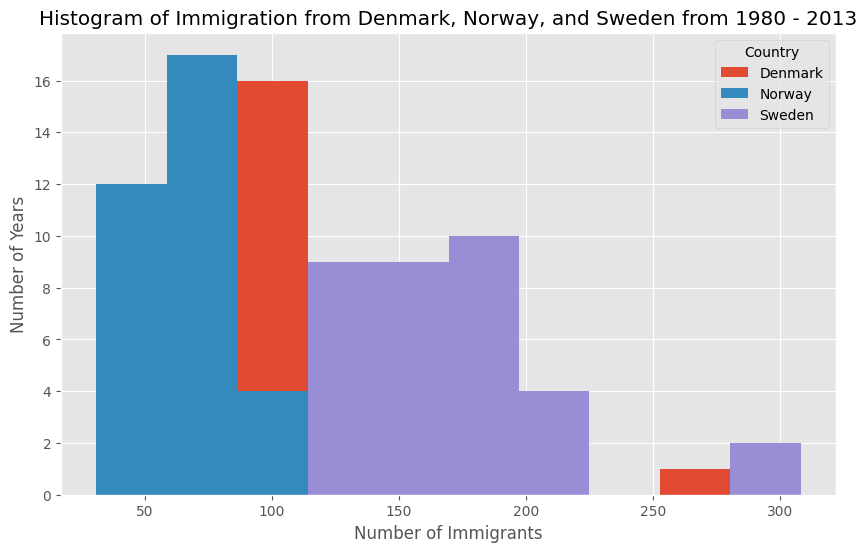

In [40]:
# tạo biểu đồ tần suất
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hãy thực hiện một số sửa đổi để cải thiện tác động và tính thẩm mỹ của biểu đồ trước đó:

-   tăng kích thước bin lên 15 bằng cách truyền vào tham số `bin`
-   đặt transparency thành 60% bằng cách truyền vào tham số `alpha`
-   gắn nhãn trục x bằng cách truyền vào tham số `x-label`
-   thay đổi màu sắc của các biểu đồ bằng cách truyền vào tham số `color`


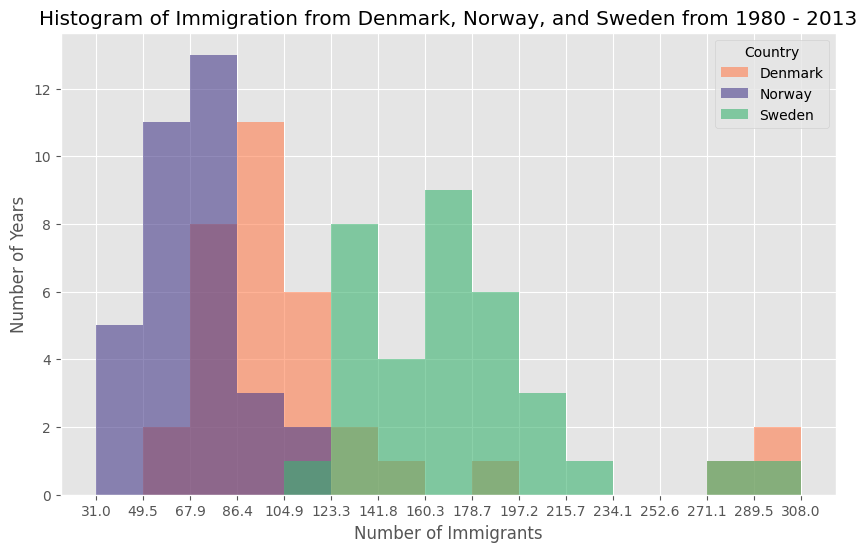

In [41]:
# hãy lấy giá trị x-tick
count, bin_edges = np.histogram(df_t, 15)

# biểu đồ không xếp chồng
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip: Để có danh sách đầy đủ các màu có sẵn trong Matplotlib, hãy chạy code sau trong python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


Nếu muốn sử dụng biểu đồ xếp chồng, chúng ta có thể xếp chồng chúng bằng tham số `stacked`. Cũng hãy điều chỉnh các nhãn trục x min và max để loại bỏ khoảng trống thừa trên các cạnh của biểu đồ. Chúng ta có thể truyền một tuple (min, max) bằng tham số `xlim` như hiển thị bên dưới.


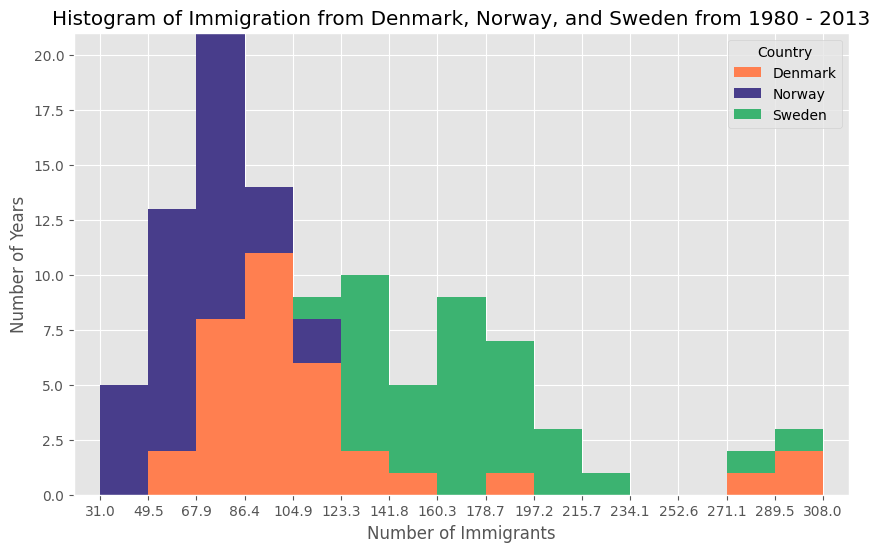

In [42]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   # giá trị bin đầu là 31.0, thêm buffer 10 cho mục đích thẩm mỹ
xmax = bin_edges[-1] + 10  # giá trị bin cuối là 308.0, thêm buffer 10 cho mục đích thẩm mỹ

# biểu đồ tần suất xếp chồng
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Câu hỏi**: Hãy sử dụng lớp scripting để hiển thị phân bố nhập cư của Hy Lạp, Albania và Bulgaria trong những năm 1980 - 2013. Sử dụng biểu đồ xếp chồng có 15 bin và giá trị transparency là 0,35.

Text(0, 0.5, 'Number of Years')

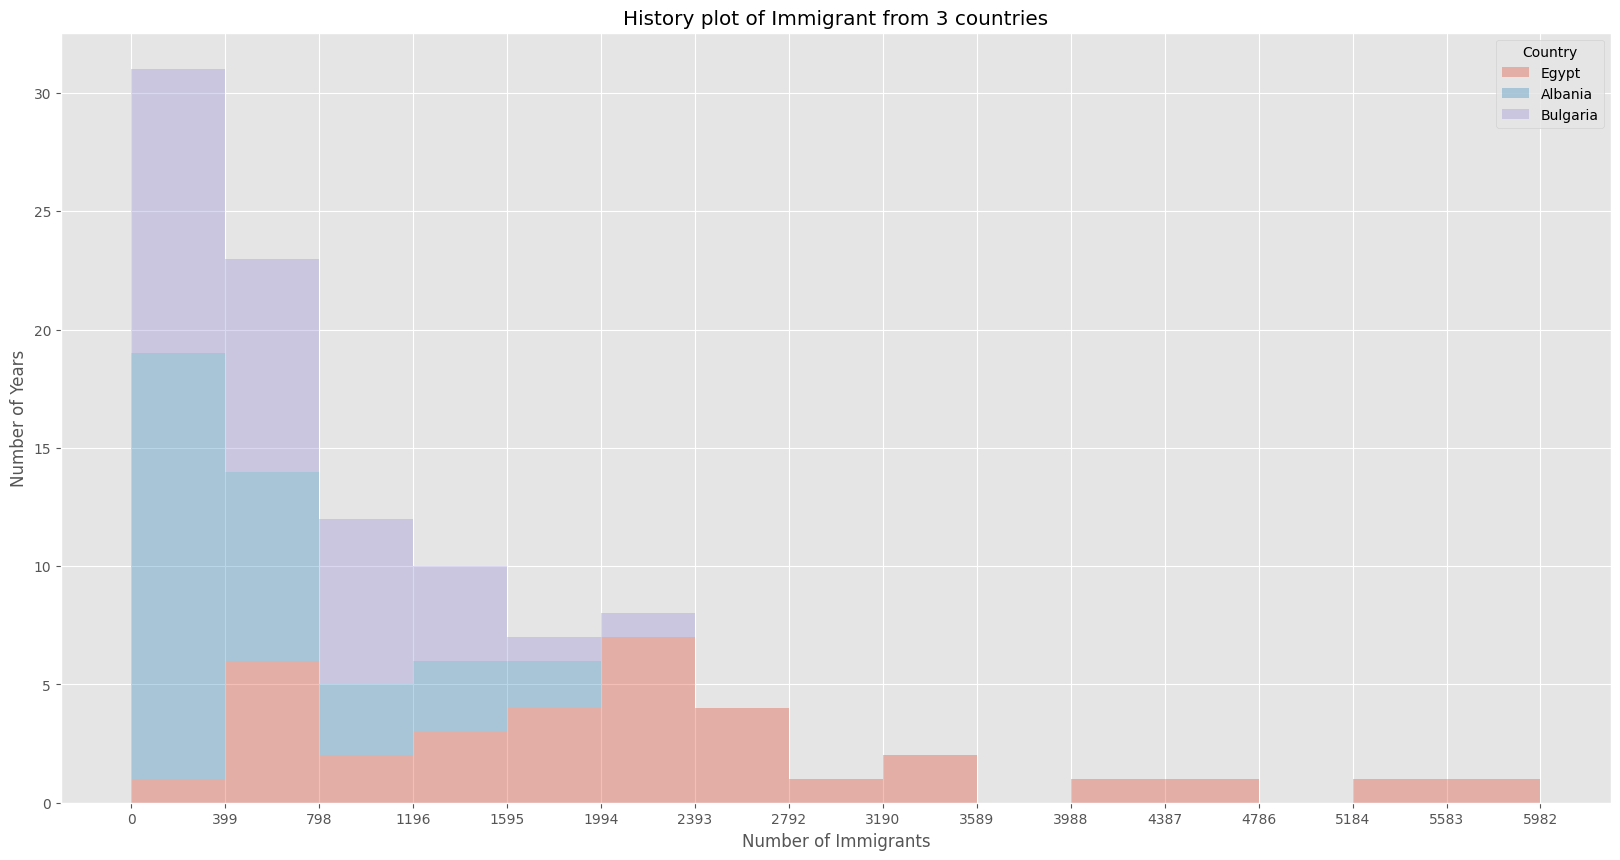

In [57]:
### nhập đáp án của bạn tại đây
df_Egypt_Al_Bul = df_can.loc[['Egypt','Albania','Bulgaria'], years]
df_Egypt_Al_Bul = df_Egypt_Al_Bul.transpose()
count, binedges = np.histogram(df_Egypt_Al_Bul, 15)
df_Egypt_Al_Bul.plot(kind='hist',
                     figsize=(20,10),
                     bins = 15,
                     xticks = binedges,
                     stacked = True,
                     alpha = 0.35
                     )
plt.title("History plot of Immigrant from 3 countries")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    
    # tạo dataframe của các quốc gia (cof)
    df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # chuyển vị dataframe
    df_cof = df_cof.transpose()

    # lấy giá trị x-tick
    count, bin_edges = np.histogram(df_cof, 15)

    # biểu đồ tần suất không xếp chồng
    df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

    plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
    plt.ylabel('Number of Years')
    plt.xlabel('Number of Immigrants')

    plt.show()

    
```

</details>


# Biểu đồ cột (Dataframe) <a id="10"></a>

Biểu đồ cột là một cách biểu diễn dữ liệu, trong đó _độ dài_ của các cột thể hiện độ lớn / kích thước của đối tượng / biến. Biểu đồ cột thường biểu diễn các biến số và biến phân loại được nhóm lại trong các khoảng thời gian.

Để tạo một biểu đồ cột, chúng ta có thể truyền một trong hai đối số thông qua tham số `kind` trong `plot()`:

-   `kind=bar` tạo một biểu đồ cột _đứng_
-   `kind=barh` tạo một biểu đồ cột _ngang_


**Biểu đồ cột đứng**

Trong biểu đồ cột đứng, trục x được sử dụng để ghi nhãn và chiều dài của các cột trên trục y tương ứng với độ lớn của biến được đo. Biểu đồ cột đứng đặc biệt hữu ích trong việc phân tích dữ liệu chuỗi thời gian. Một điểm bất lợi là chúng thiếu không gian để gắn nhãn văn bản dưới chân mỗi cột.

**Hãy bắt đầu bằng cách phân tích tác động của Khủng hoảng tài chính ở Iceland:**

Khủng hoảng tài chính Iceland 2008 - 2011 là một sự kiện kinh tế và chính trị lớn ở Iceland. Liên quan tới quy mô nền kinh tế, sự sụp đổ hệ thống ngân hàng của Iceland là sự cố lớn nhất mà bất kỳ quốc gia nào trong lịch sử kinh tế phải trải qua. Cuộc khủng hoảng đã dẫn đến suy thoái kinh tế nghiêm trọng trong năm 2008 - 2011 và tình trạng bất ổn chính trị nghiêm trọng.

**Câu hỏi:** Hãy so sánh số lượng người Iceland nhập cư (country='Iceland') đến Canada từ năm 1980 đến năm 2013.


In [58]:
# bước 1: lấy dữ liệu
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

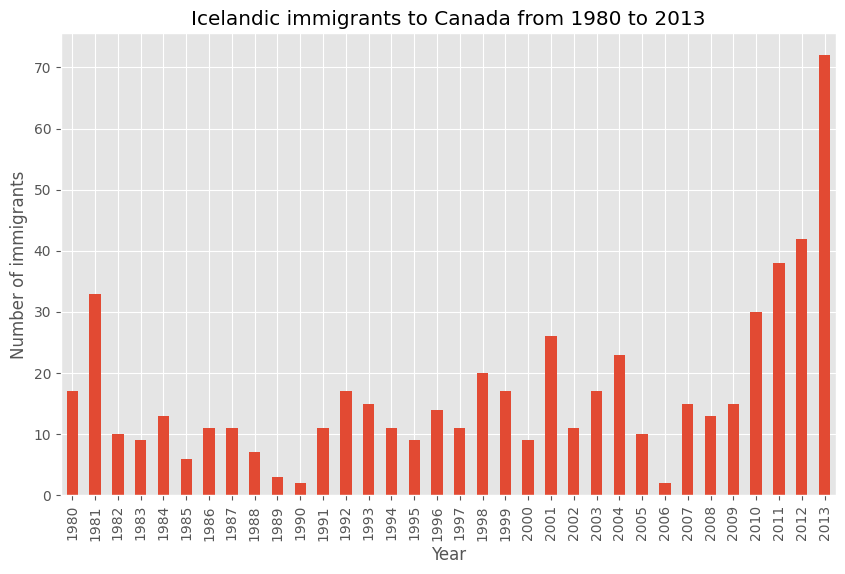

In [59]:
# bước 2: vẽ biểu đồ dữ liệu
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # thêm nhãn x vào biểu đồ
plt.ylabel('Number of immigrants') # thêm nhãn y vào biểu đồ
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # thêm tiêu đề vào biểu đồ

plt.show()

Biểu đồ cột ở trên cho thấy tổng số người nhập cư được chia nhỏ theo mỗi năm. Chúng ta có thể thấy rõ tác động của cuộc khủng hoảng tài chính, số lượng người nhập cư đến Canada bắt đầu tăng nhanh sau năm 2008.

Hãy chú thích điều này trên biểu đồ bằng phương thức `annotate` của **lớp scripting** hoặc **interface pyplot**. Chúng ta sẽ truyền các tham số sau:

-   `s`: str, văn bản trích dẫn.
-   `xy`: Tuple chỉ định điểm (x,y) để chú thích (trong trường hợp này là điểm cuối của mũi tên).
-   `xytext`: Tuple chỉ định điểm (x, y) để đặt văn bản (trong trường hợp này là điểm bắt đầu của mũi tên).
-   `xycoords`: Hệ tọa độ mà xy được cho trong - 'data' sử dụng hệ tọa độ của đối tượng được chú thích (mặc định).
-   `arrowprops`: Sử dụng dictionary các thuộc tính để vẽ mũi tên:
    -   `arrowstyle`: Chỉ định kiểu mũi tên, `'->'` là mũi tên tiêu chuẩn.
    -   `connectionstyle`: Chỉ định kiểu kết nối. `arc3` là một đường thẳng.
    -   `color`: Chỉ định màu của mũi tên.
    -   `lw`: Chỉ định chiều rộng dòng.

Chúng tôi khuyến khích bạn đọc tài liệu Matplotlib để biết thêm chi tiết về các chú thích:
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


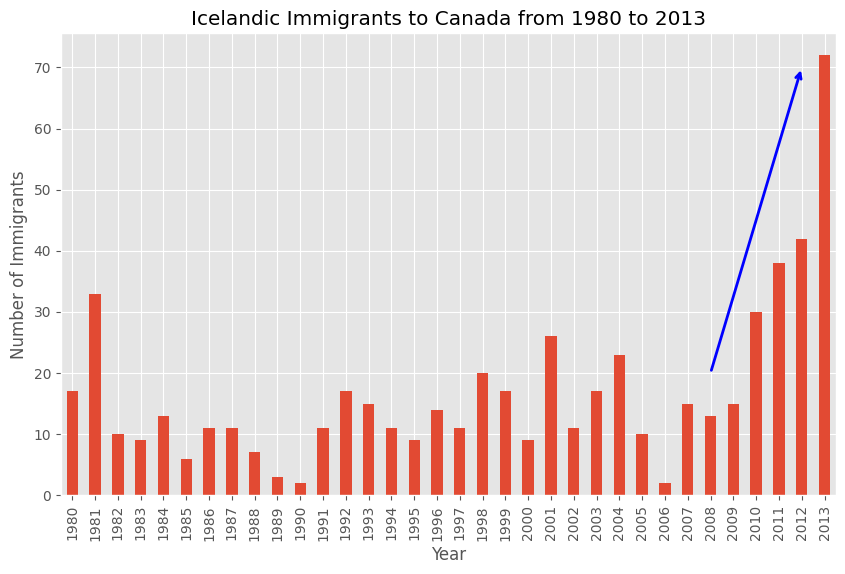

In [60]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # quay xtick(điểm gắn nhãn trên trục x) 90 độ

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Chú thích mũi tên
plt.annotate('',                      # s: str. sẽ để trống vì không có văn bản
             xy=(32, 70),             # đặt đầu mũi tên tại điểm (year 2012 , pop 70)
             xytext=(28, 20),         # đặt đuôi mũi tên tại điểm (year 2008 , pop 20)
             xycoords='data',         # sử dụng hệ tọa độ của điểm đang được chú thích
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Cũng hãy chú thích một văn bản để đi qua mũi tên. Chúng ta sẽ truyền các tham số bổ sung sau:

-   `rotation`: góc xoay của văn bản theo độ (ngược chiều kim đồng hồ)
-   `va`: căn chỉnh theo chiều dọc của văn bản [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: căn lề ngang của văn bản [‘center’ | ‘right’ | ‘left’]


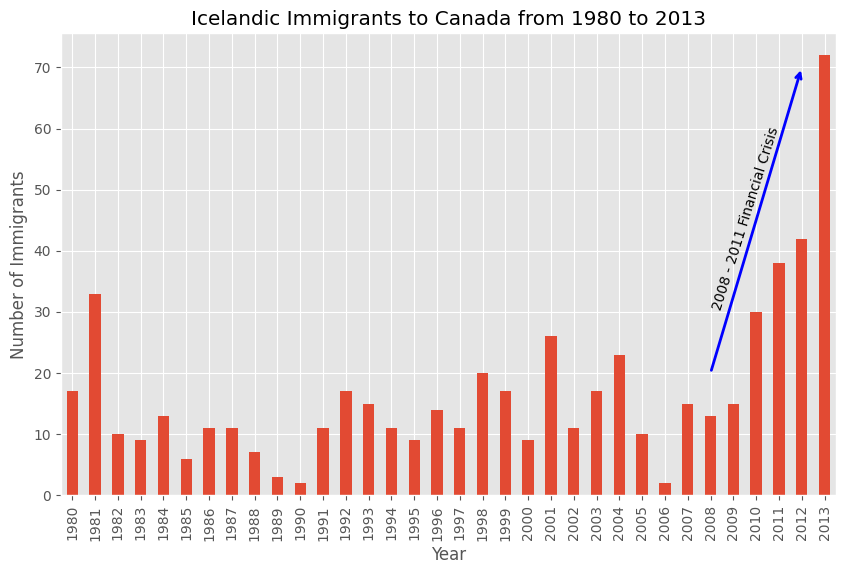

In [61]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# xoay mũi tên
plt.annotate('',                      # s: str. sẽ để trống vì không có văn bản
             xy=(32, 70),             # đặt đầu mũi tên tại điểm (year 2012 , pop 70)
             xytext=(28, 20),         # đặt đuôi mũi tên tại điểm (year 2008 , pop 20)
             xycoords='data',         # sử dụng hệ tọa độ của điểm đang được chú thích
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# xoay văn bản
plt.annotate('2008 - 2011 Financial Crisis', # văn bản hiển thị
             xy=(28, 30),                    # bắt đầu văn bản tại điểm (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # muốn căn chỉnh văn bản theo chiều dọc: 'bottom'
             ha='left',                      # muốn căn lề ngang văn bản: 'left'
            )

plt.show()

**Biểu đồ cột ngang**

Đôi khi, việc biểu diễn dữ liệu theo chiều ngang sẽ thực tế hơn, đặc biệt nếu bạn cần thêm chỗ để gắn nhãn các cột. Trong biểu đồ cột ngang, trục y được sử dụng để ghi nhãn và chiều dài của các cột trên trục x tương ứng với độ lớn của biến được đo. Như bạn sẽ thấy, trên trục y có nhiều chỗ hơn để gắn nhãn các biến phân loại.

**Câu hỏi:** Sử dụng lớp scripting và tập dữ liệu `df_can`, tạo biểu đồ cột _ngang_ hiển thị _tổng_ số người nhập cư đến Canada từ top 15 quốc gia trong giai đoạn 1980 - 2013. Gắn nhãn mỗi quốc gia với tổng số người nhập cư.


Bước 1: Nhận dữ liệu liên quan đến top 15 quốc gia.


In [85]:
### nhập đáp án của bạn tại đây
df_top15 = df_can['Total'][0:15]
#df_top15 = df_top15['Total']
#df_top15 = df_top15.transpose()
print(df_top15)



Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    
    # sắp xếp dataframe trên cột 'Total' (tăng dần)
    df_can.sort_values(by='Total', ascending=True, inplace=True)

    # lấy top 15 quốc gia
    df_top15 = df_can['Total'].tail(15)
    df_top15

```

</details>


Bước 2: Vẽ biểu đồ dữ liệu:

1.  Sử dụng `kind='barh'` để tạo biểu đồ cột ngang.
2. Đảm bảo chọn kích thước phù hợp cho biểu đồ và dán nhãn cho các trục và đặt tiêu đề cho biểu đồ.
3.  Lặp qua các quốc gia và chú thích dân số nhập cư bằng cách sử dụng hàm chú thích của interface scripting.


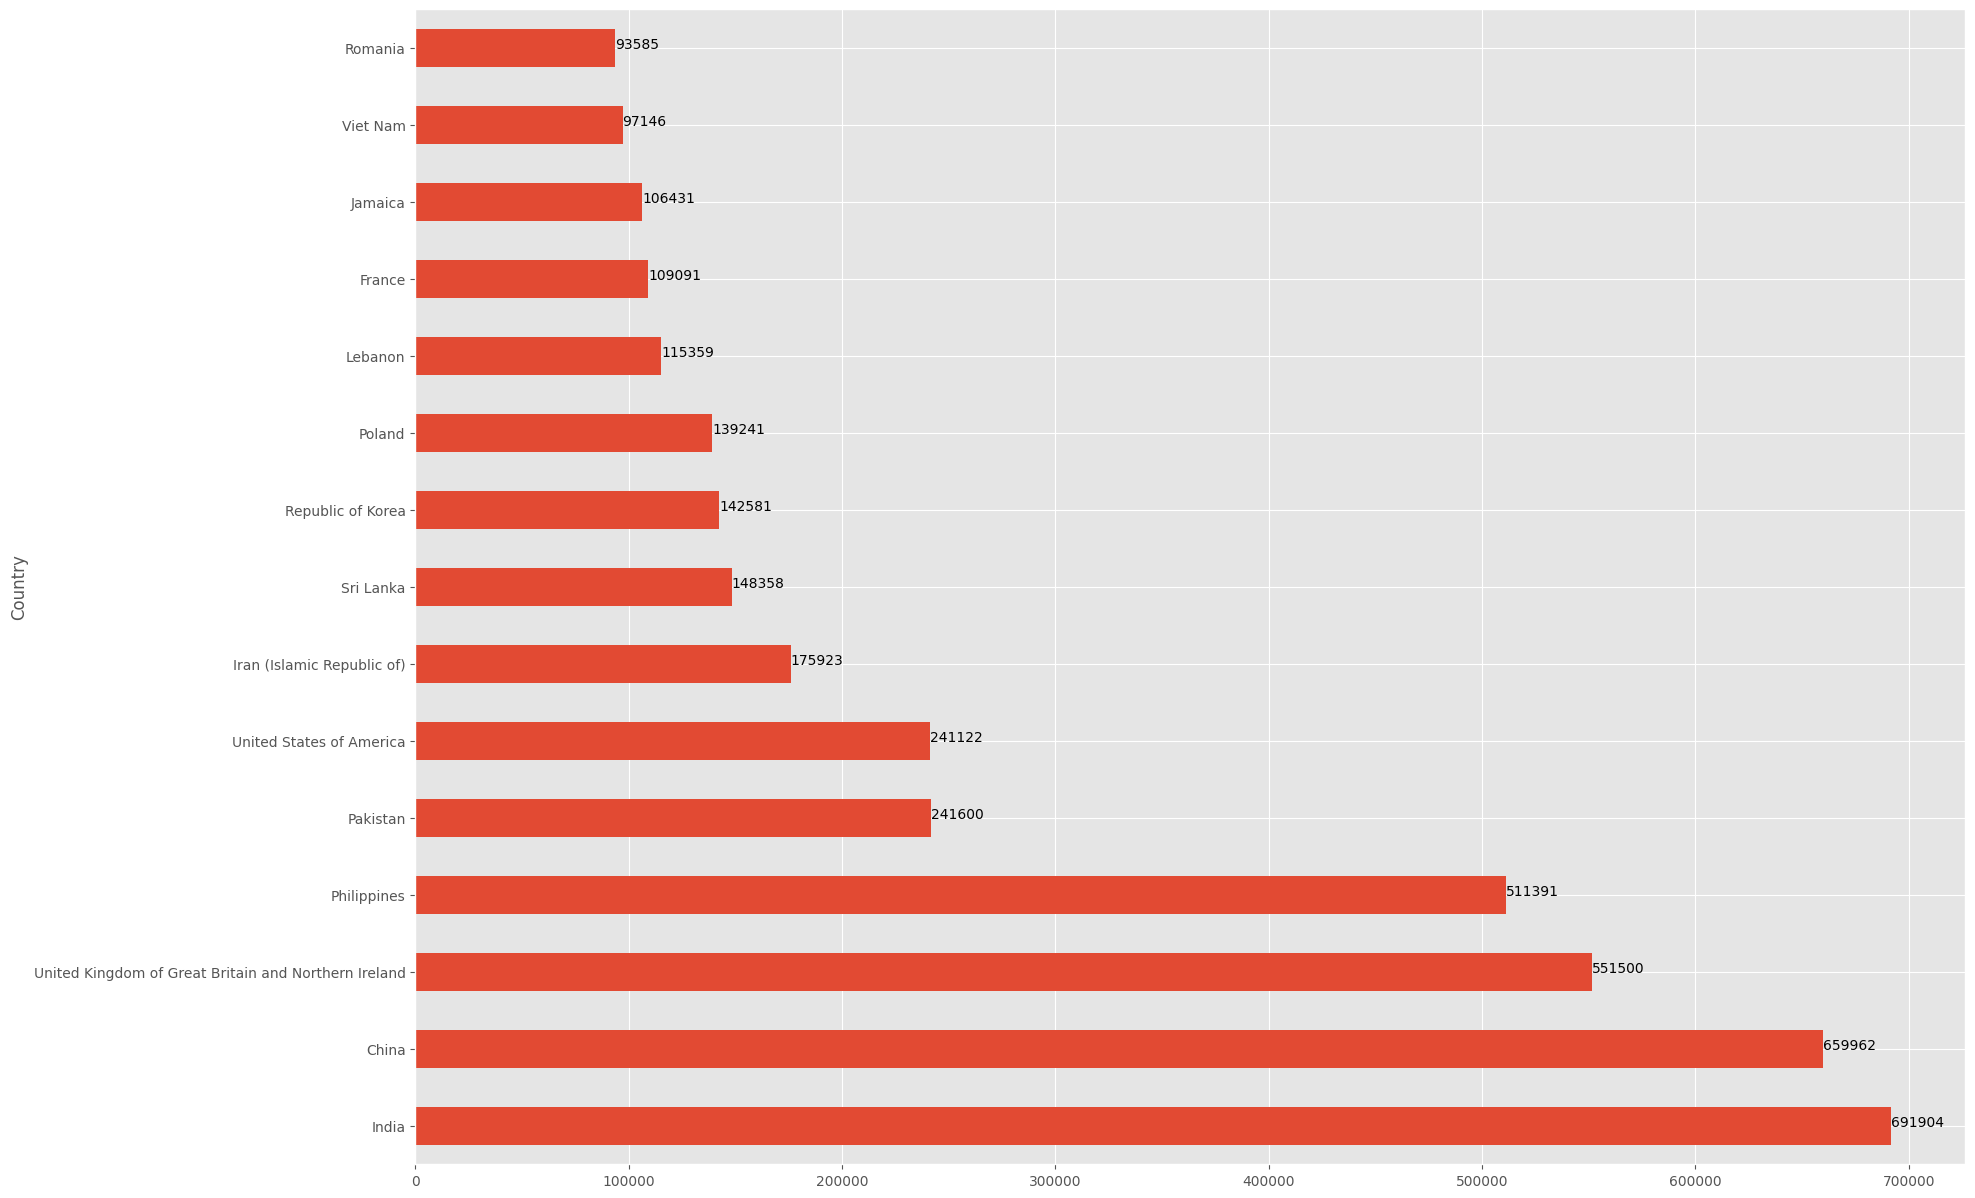

In [86]:
df_top15.plot(kind='barh', figsize = (20,15))

for index,value in enumerate(df_top15):
  plt.annotate(
      value,
      xy=(int(value), index)
  )
plt.show()

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    
    # tạo biểu đồ
    df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
    plt.xlabel('Number of Immigrants')
    plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

    # chú thích nhãn giá trị cho mỗi quốc gia
    for index, value in enumerate(df_top15):
        label = format(int(value), ',') # định dạng int với dấu phẩy
    
    # đặt văn bản ở cuối cột (x - 47000, và y - 0.1 để khớp với cột)
        plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

    plt.show()

```

</details>
